In [121]:
%matplotlib notebook
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import integrate
import ipywidgets as ipw

In [122]:
alpha = 1. #mortality rate due to predators
beta = 1.
delta = 1.
gamma = 1.
x0 = 4.
y0 = 2.

def derivative(X, t, alpha, beta, delta, gamma):
    x, y = X
    dotx = x * (alpha - beta * y)
    doty = y * (-delta + gamma * x)
    return np.array([dotx, doty])

In [123]:
Nt = 1000000
tmax = 30000.
t = np.linspace(0.,tmax, Nt)
X0 = [x0, y0]
res = integrate.odeint(derivative, X0, t, args = (alpha, beta, delta, gamma))
x, y = res.T

<IPython.core.display.Javascript object>


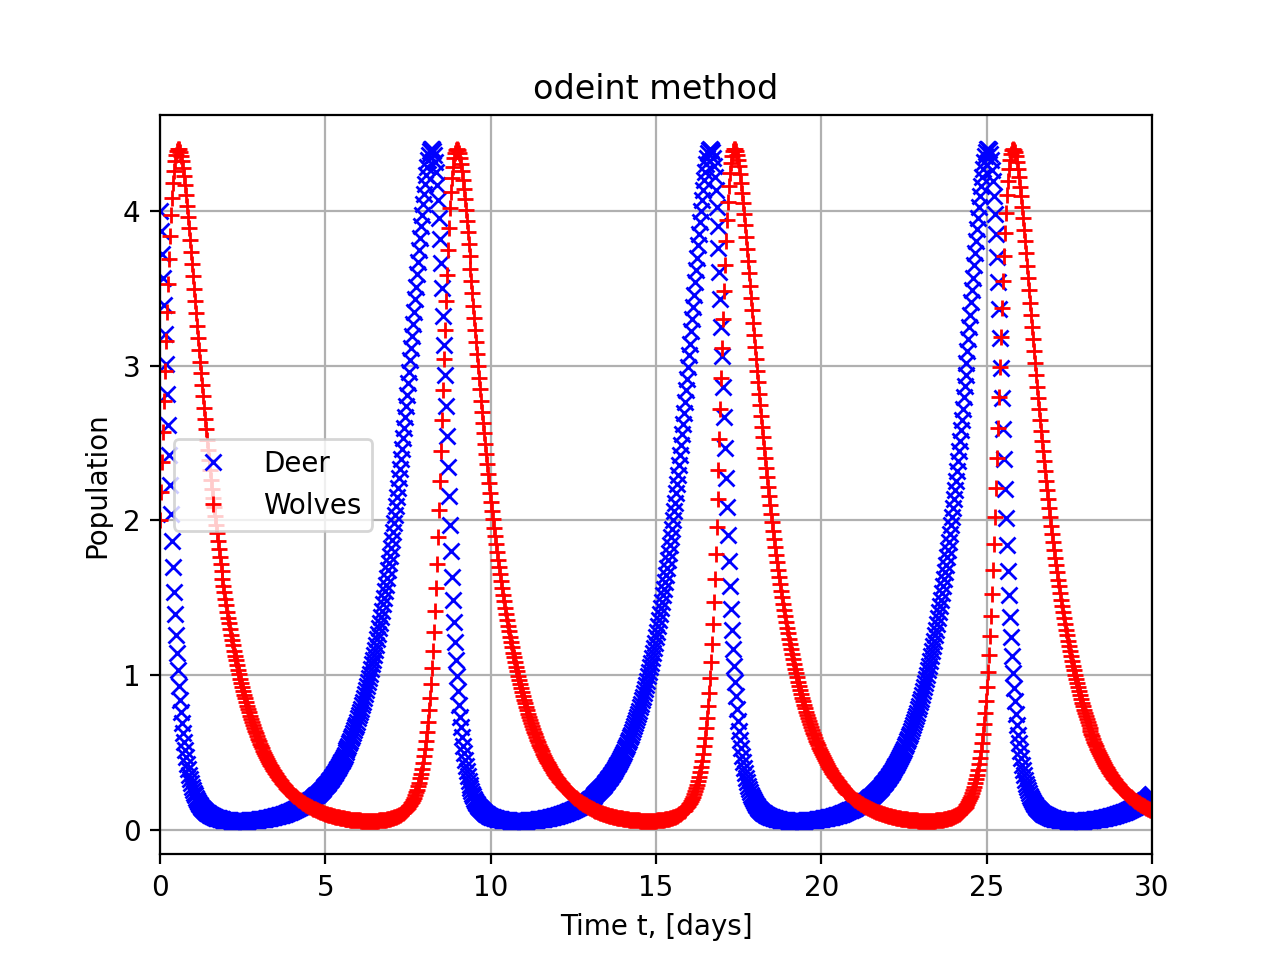

(0.0, 30.0)

In [125]:
plt.figure()
plt.grid()
plt.title("odeint method")
plt.plot(t, x, 'xb', label = 'Deer')
plt.plot(t, y, '+r', label = "Wolves")
plt.xlabel('Time t, [days]')
plt.ylabel('Population')
plt.legend()
plt.xlim([0,30])

#plt.show()


In [126]:
def Euler(func, X0, t, alpha, beta, delta, gamma):
    """
    Euler solver.
    """
    dt = t[1] - t[0]
    nt = len(t)
    X  = np.zeros([nt, len(X0)])
    X[0] = X0
    for i in range(nt-1):
        X[i+1] = X[i] + func(X[i], t[i], alpha,  beta, delta, gamma) * dt
    return X

<ipython-input-122-720cf8fd5344>:10: RuntimeWarning: overflow encountered in double_scalars
  dotx = x * (alpha - beta * y)
<ipython-input-122-720cf8fd5344>:11: RuntimeWarning: overflow encountered in double_scalars
  doty = y * (-delta + gamma * x)


<IPython.core.display.Javascript object>


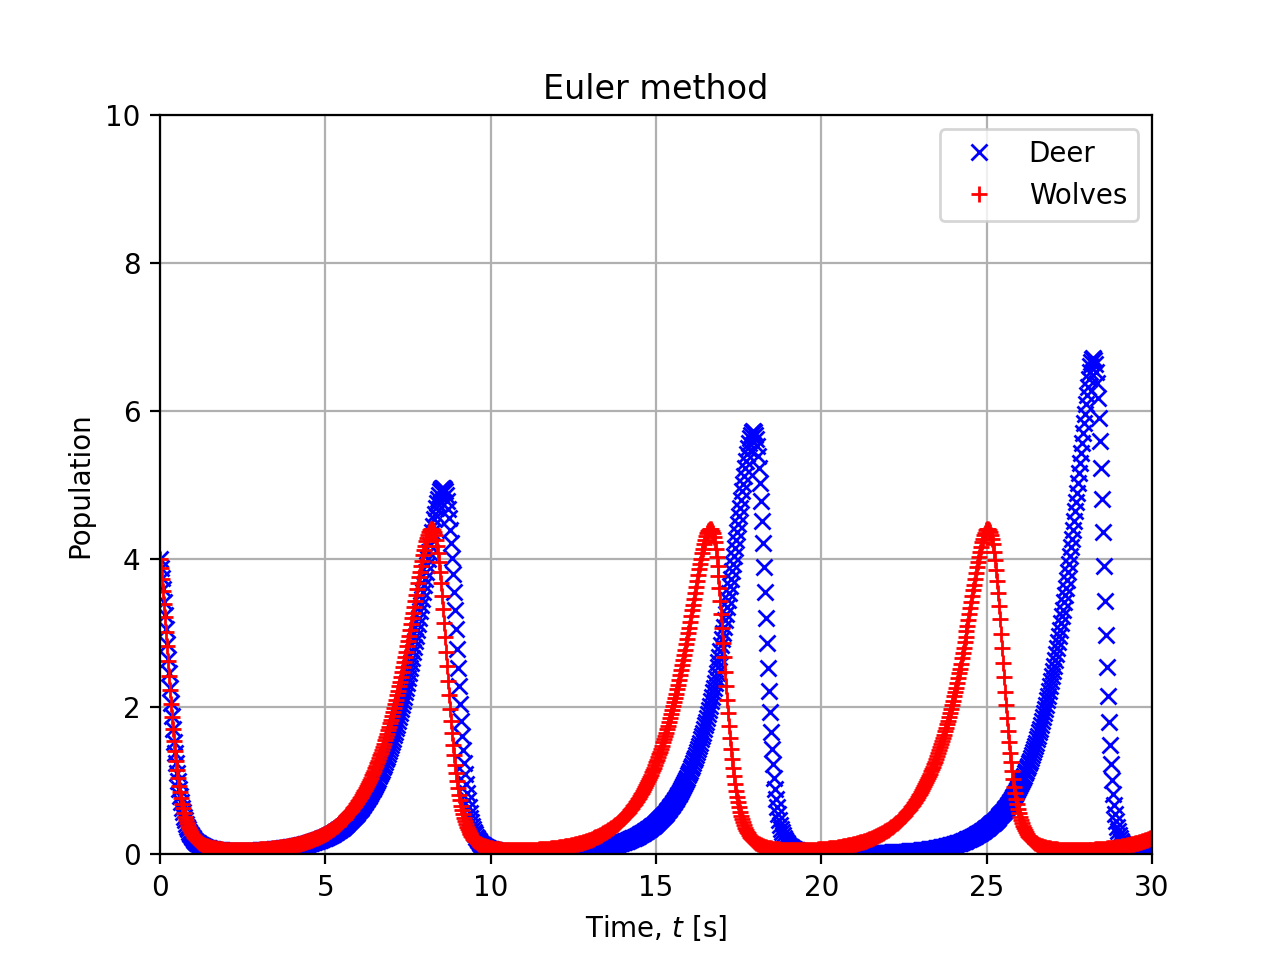

In [127]:
Xe = Euler(derivative, X0, t, alpha, beta, delta, gamma)
plt.figure()
plt.title("Euler method")
plt.plot(t, Xe[:, 0], 'xb', label = 'Deer')
plt.plot(t, x, '+r', label = "Wolves")
plt.xlim([0,30])
plt.grid()
plt.xlabel("Time, $t$ [s]")
plt.ylabel('Population')
plt.ylim([0.,10.])
plt.legend(loc = "best")

plt.show()

In [95]:
plt.plot(t,x)

In [101]:
def RK4(func, X0, t, alpha,  beta, delta, gamma):
    """
    Runge Kutta 4 solver.
    """
    dt = t[1] - t[0]
    nt = len(t)
    X  = np.zeros([nt, len(X0)])
    X[0] = X0
    for i in range(nt-1):
        k1 = func(X[i], t[i], alpha,  beta, delta, gamma)
        k2 = func(X[i] + dt/2. * k1, t[i] + dt/2., alpha,  beta, delta, gamma)
        k3 = func(X[i] + dt/2. * k2, t[i] + dt/2., alpha,  beta, delta, gamma)
        k4 = func(X[i] + dt    * k3, t[i] + dt, alpha,  beta, delta, gamma)
        X[i+1] = X[i] + dt / 6. * (k1 + 2. * k2 + 2. * k3 + k4)
    return X

<IPython.core.display.Javascript object>


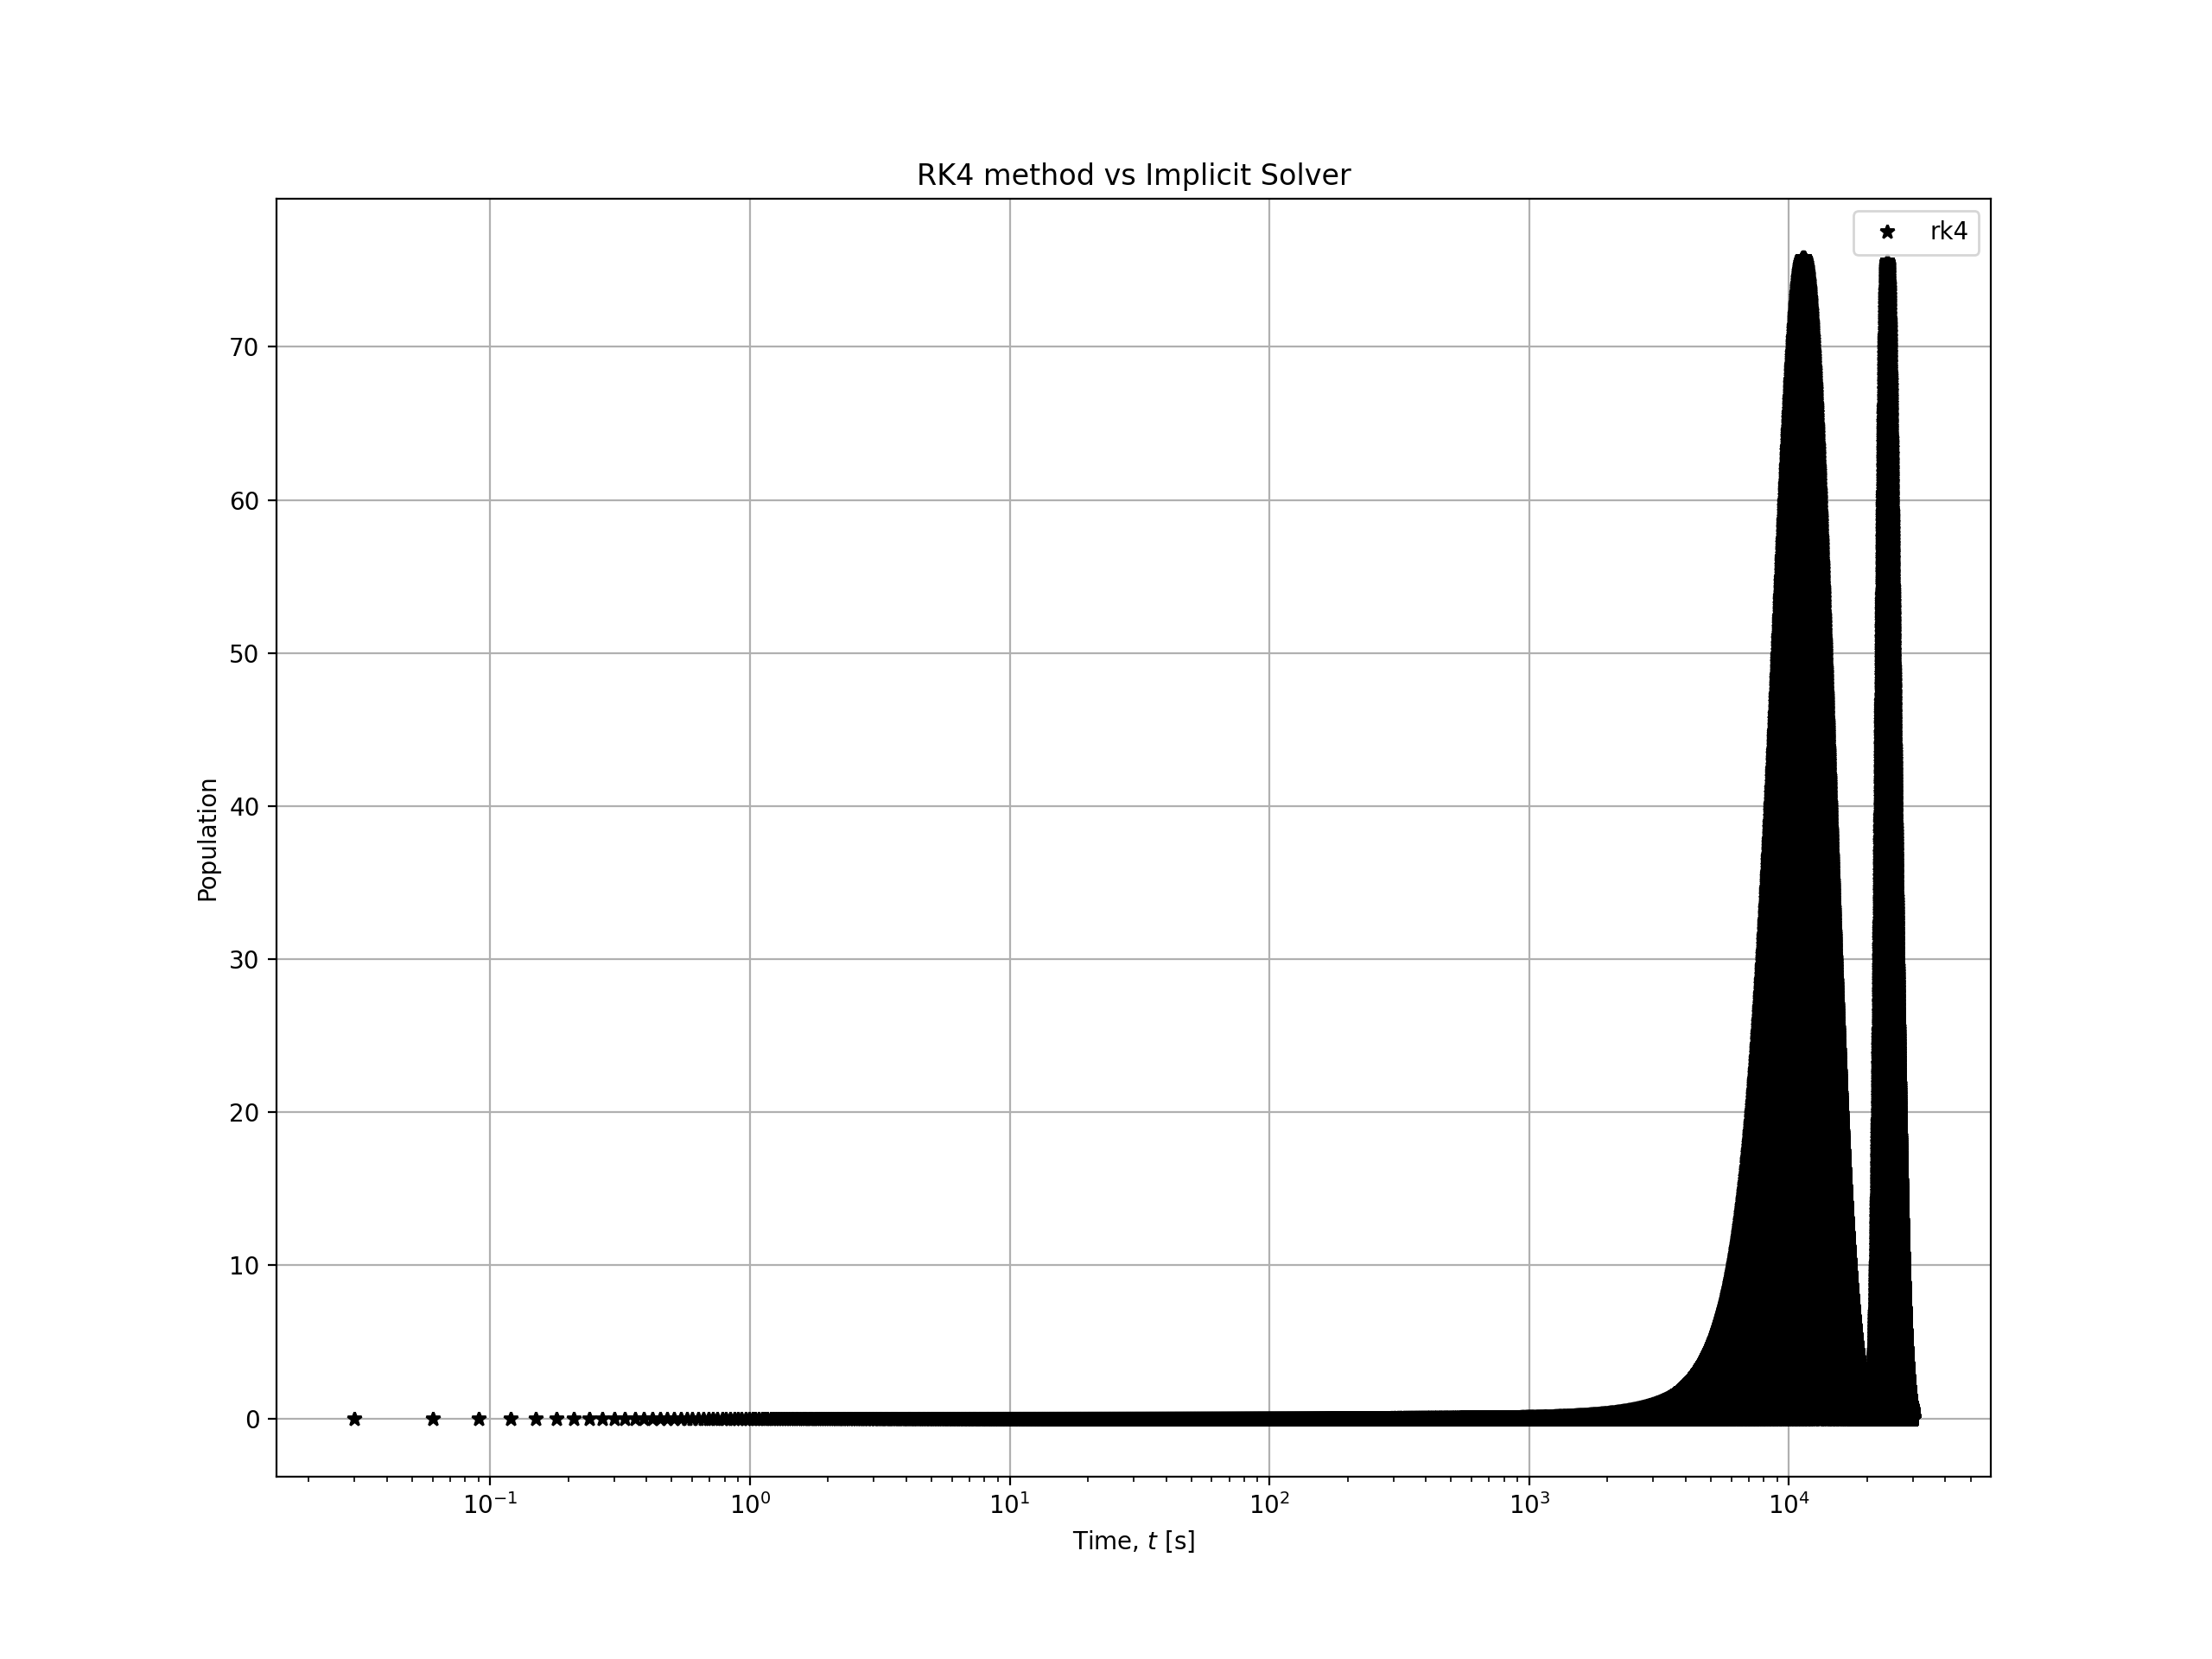

In [102]:
Xrk4 = RK4(derivative, X0, t, alpha,  beta, delta, gamma)


<IPython.core.display.Javascript object>


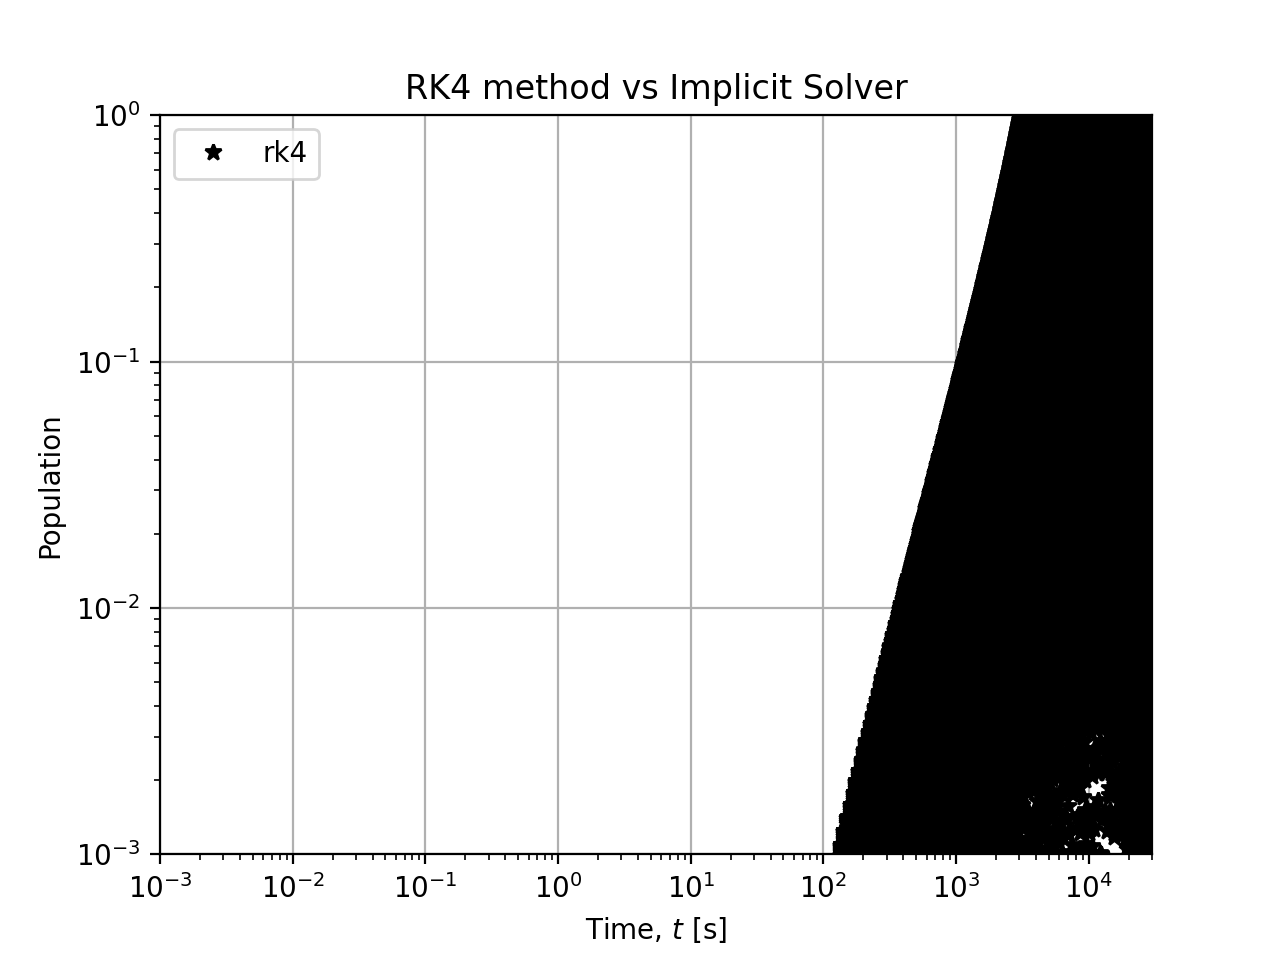

In [108]:
plt.figure()
plt.title("RK4 method vs Implicit Solver")
plt.plot(t, np.abs(Xrk4[:, 0]-x)/x, 'k*', label = 'rk4')
#plt.plot(t, x, '+r', label = "odeint")
#plt.plot(t, Xe[:, 0], 'g*', label = 'Euler')
plt.xscale('log')
plt.yscale('log')

plt.xlim([0.001,30000])
plt.ylim([0.001,1])
plt.grid()
plt.xlabel("Time, $t$ [s]")
plt.ylabel('Population')
plt.legend(loc = "best")

<IPython.core.display.Javascript object>


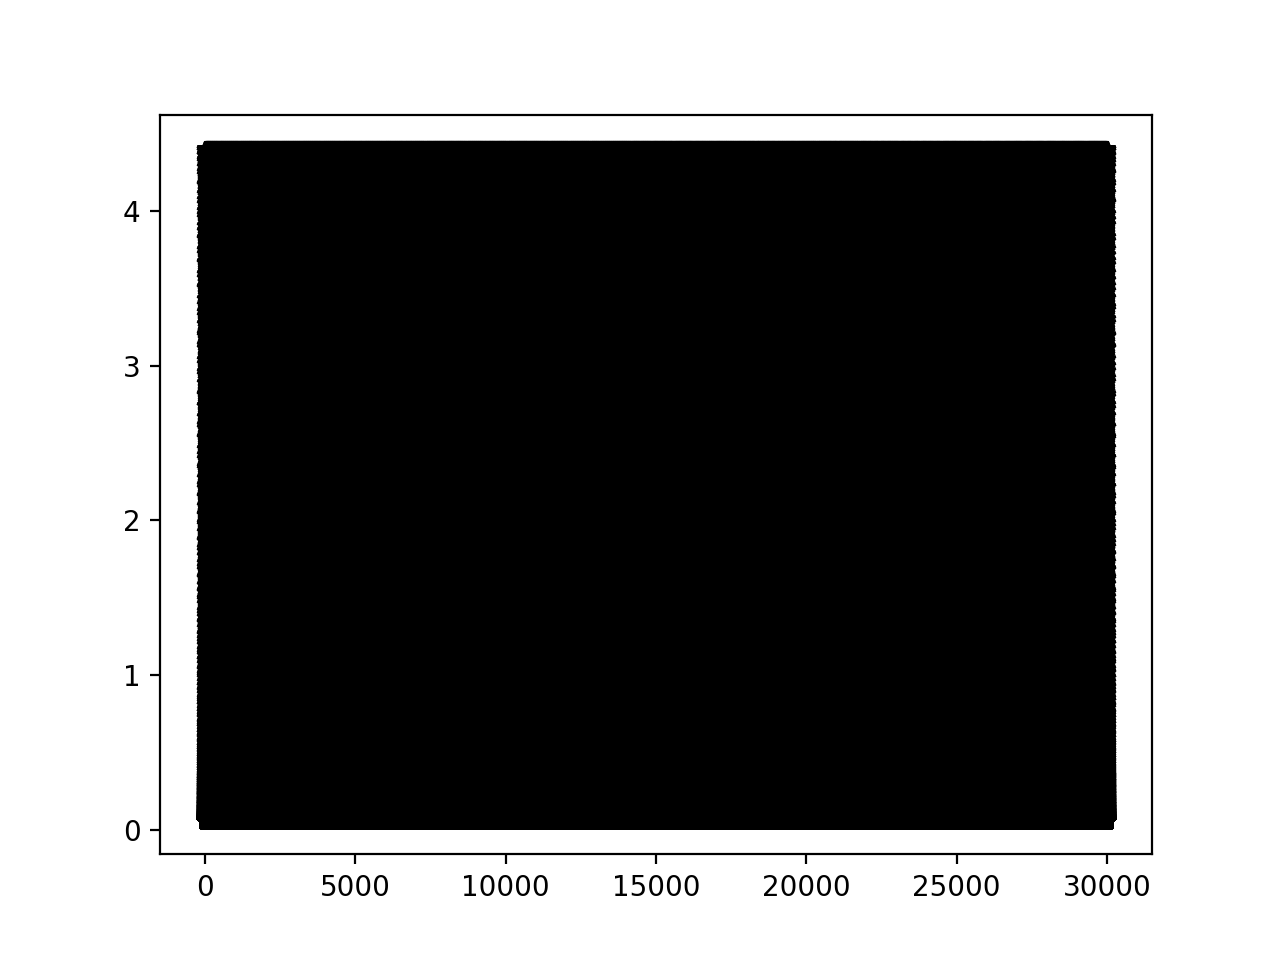

In [98]:
plt.figure()
plt.plot(t, Xrk4[:, 0], 'k*', label = 'rk4')
plt.show()

<IPython.core.display.Javascript object>


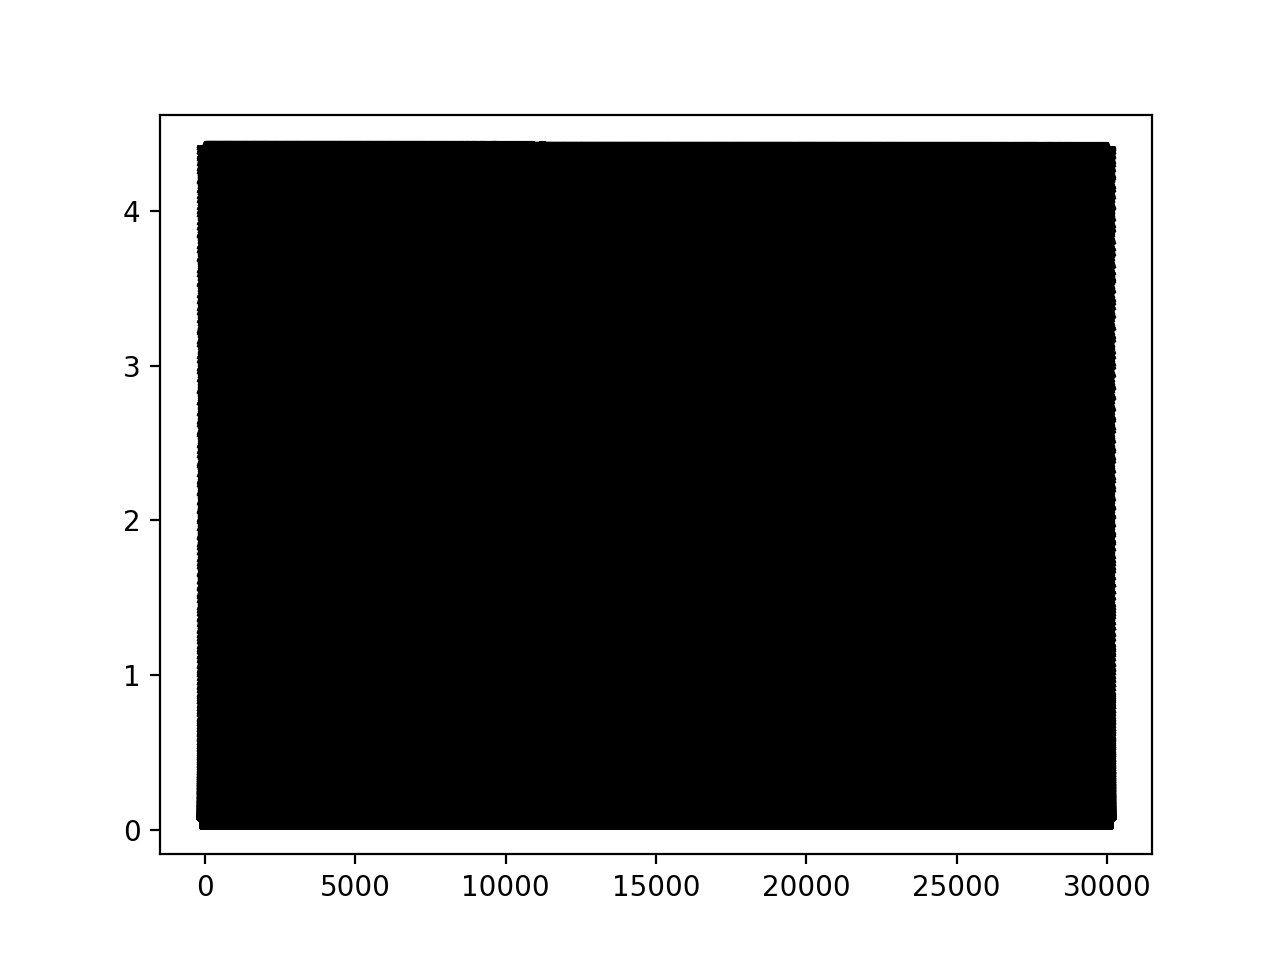

In [99]:
plt.figure()
plt.plot(t, x, 'k*', label = 'rk4')
plt.show()

<IPython.core.display.Javascript object>


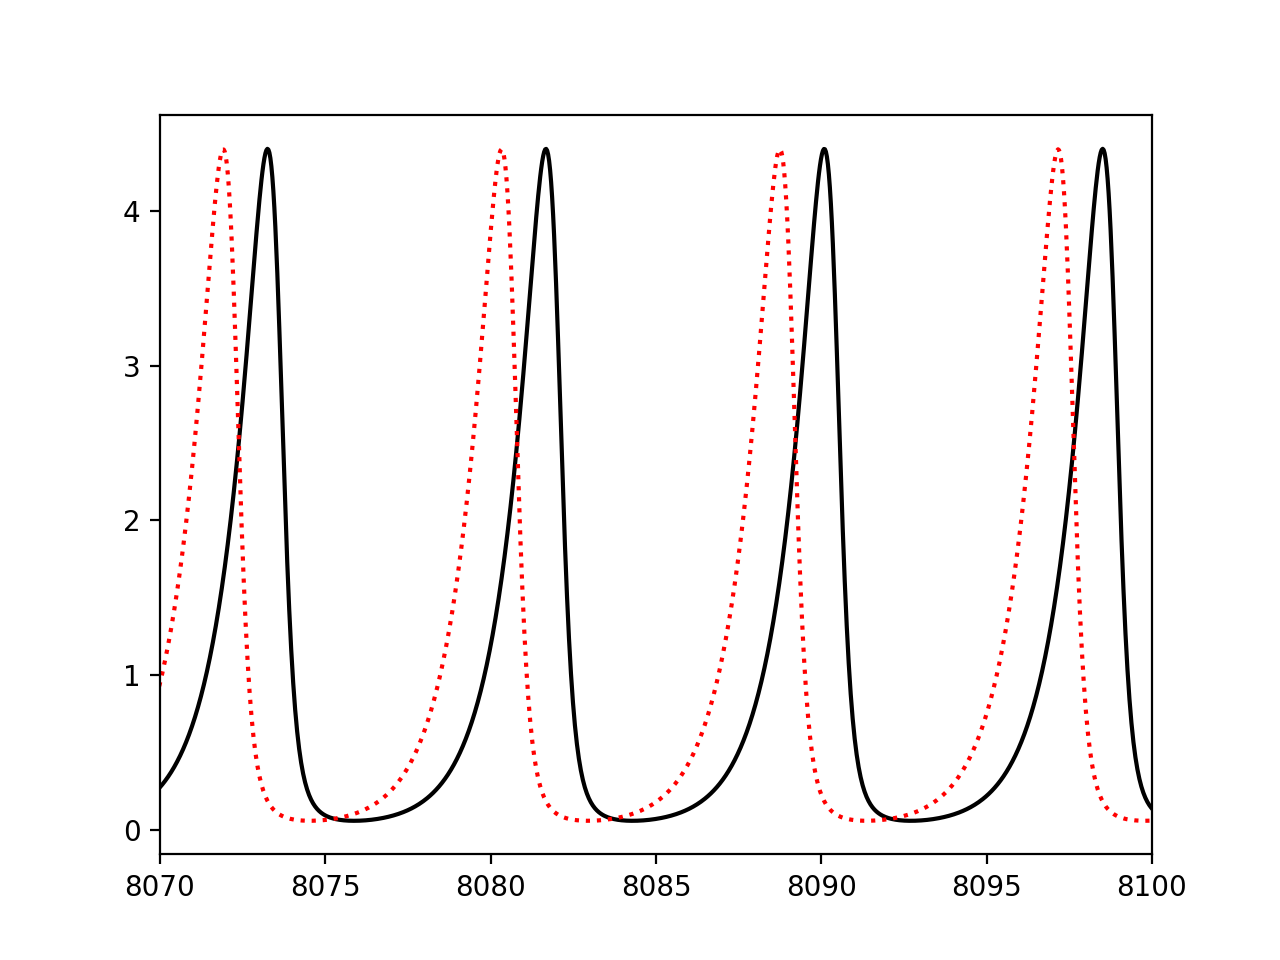

In [132]:
plt.figure()
plt.plot(t, Xrk4[:, 0], 'k-', label = 'rk4')
plt.plot(t,x,'r:',label='implicit')
base=8000
xlow=base+70
xhigh=base+100
plt.xlim([xlow,xhigh])

plt.show()

In [119]:
Nt = 10000000
Xrk4_dense = RK4(derivative, X0, t, alpha,  beta, delta, gamma)

tmax = 30000.
tdense = np.linspace(0.,tmax, Nt)

<IPython.core.display.Javascript object>


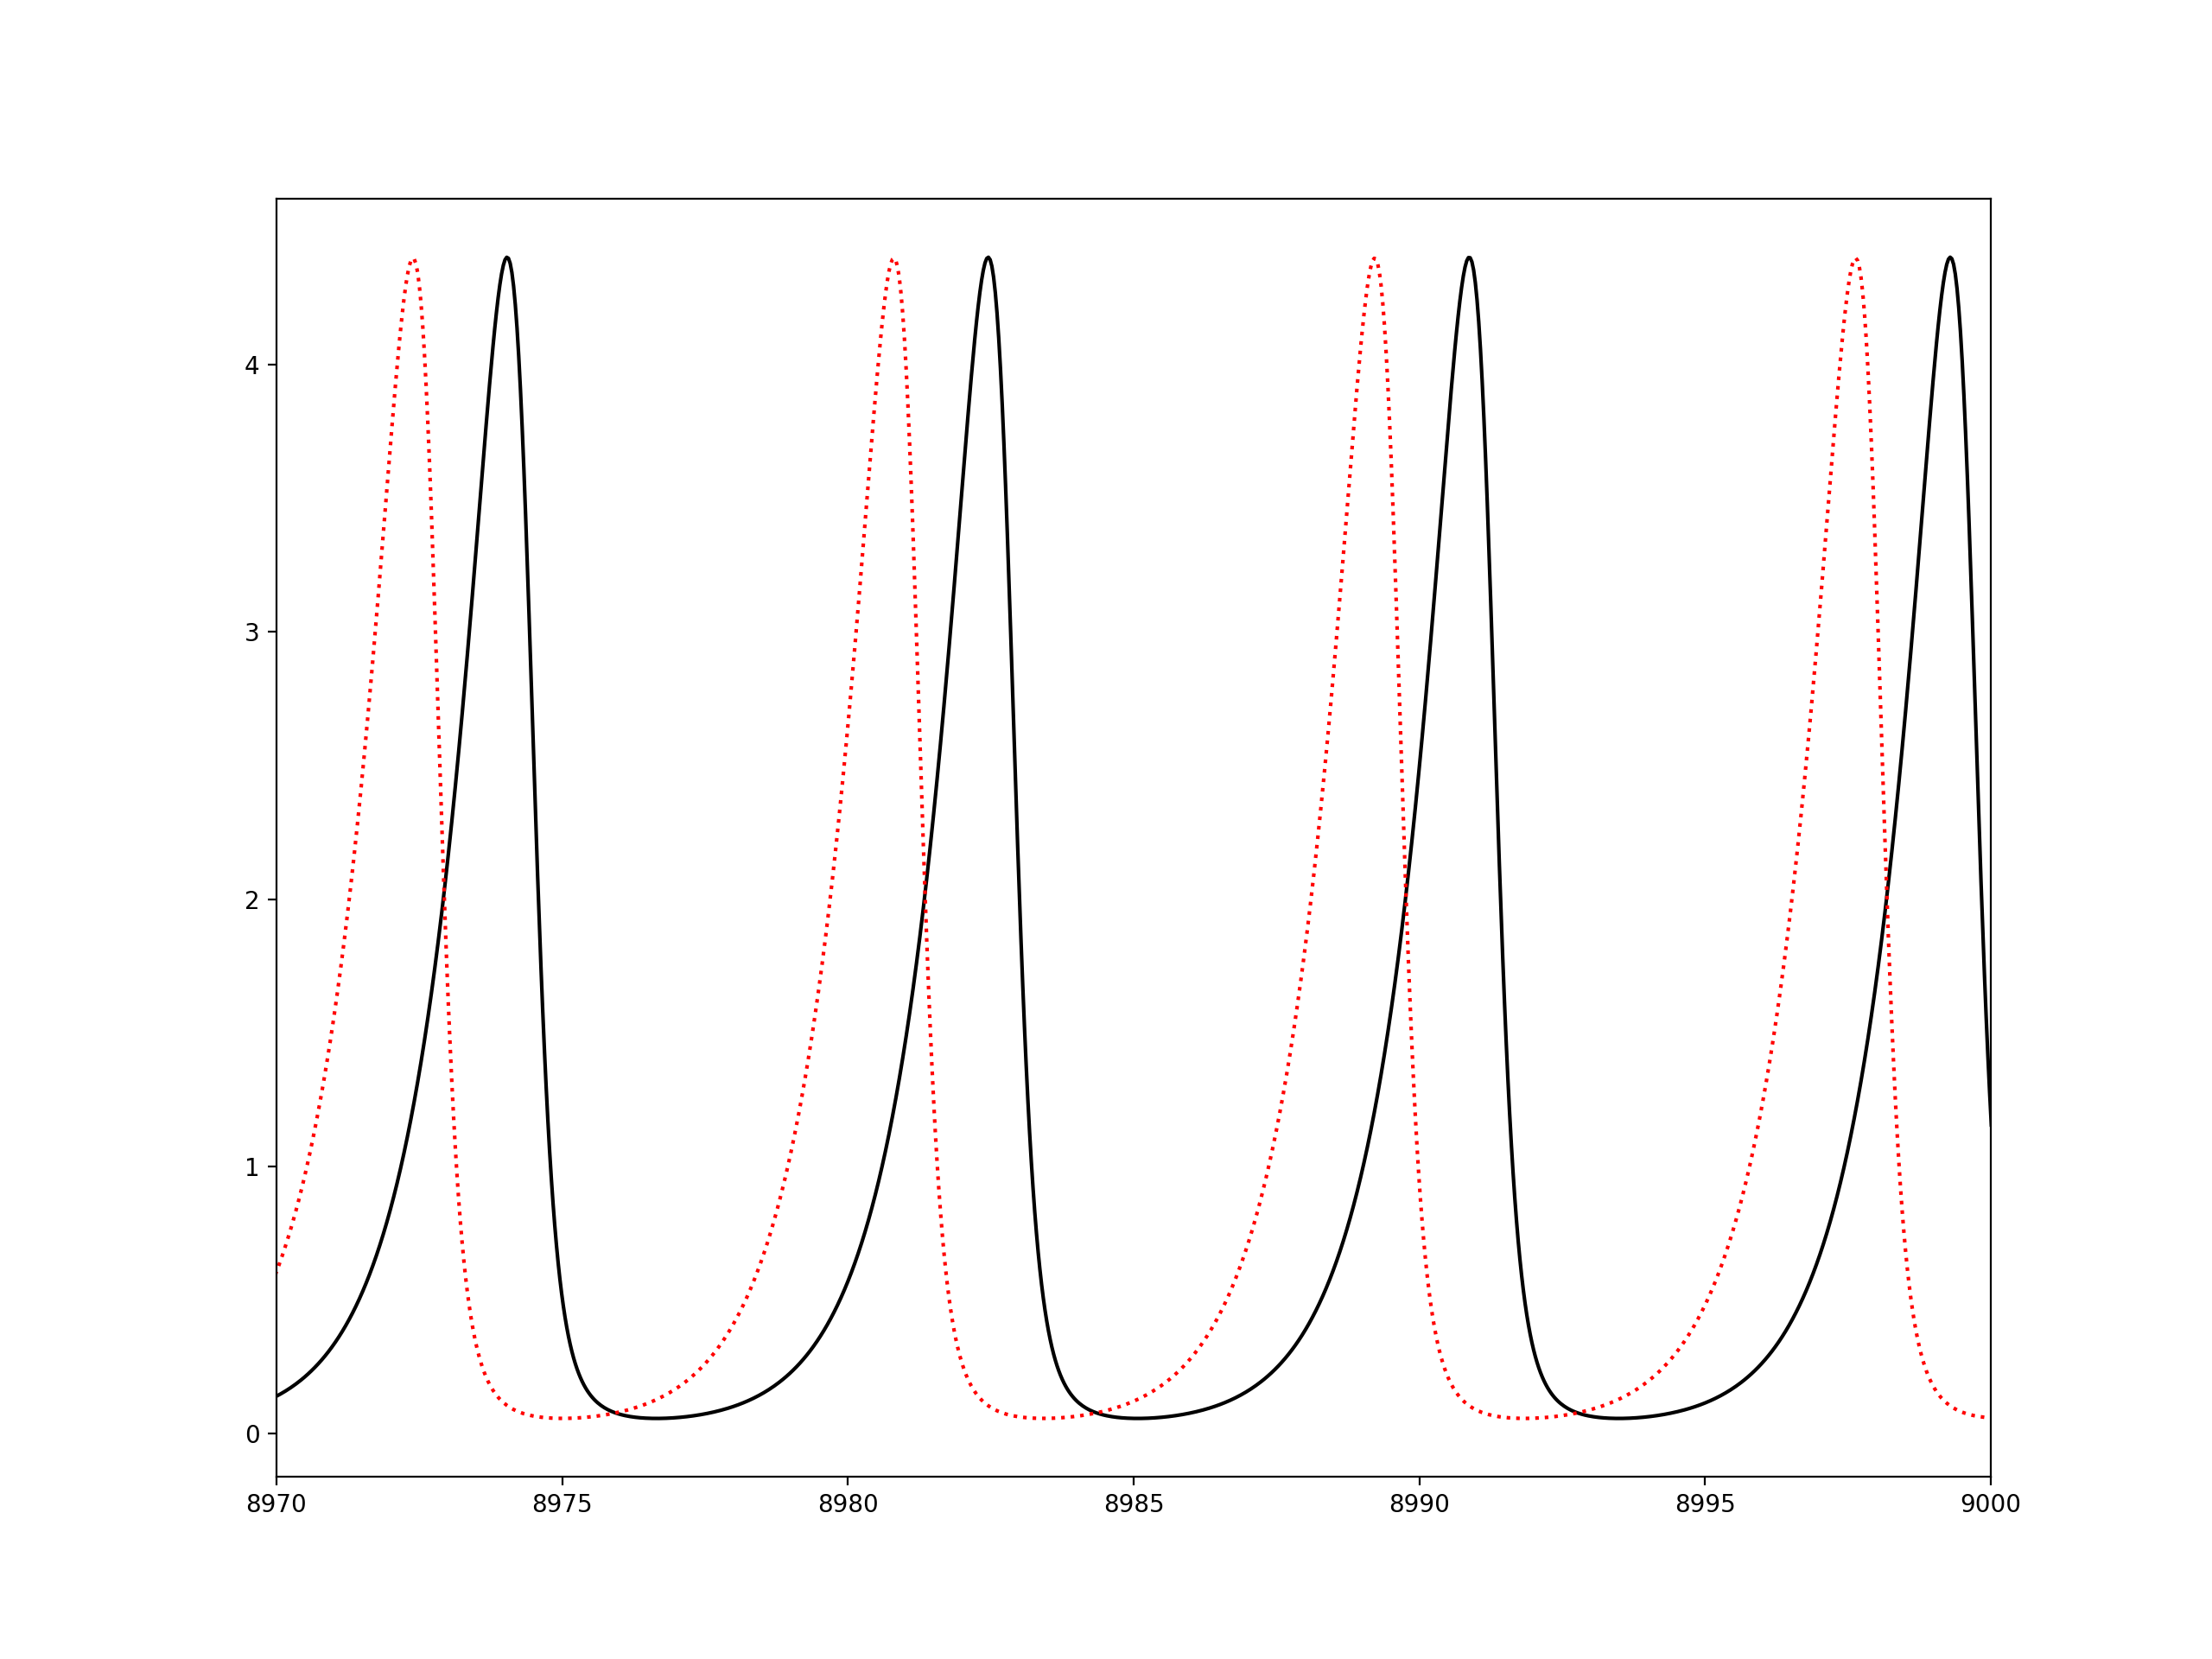

In [120]:
plt.figure()
plt.plot(t, Xrk4_dense[:, 0], 'k-', label = 'rk4')
plt.plot(t,x,'r:',label='implicit')
base=8900
xlow=base+70
xhigh=base+100
plt.xlim([xlow,xhigh])

plt.show()